In [1]:
import sys
assert sys.version_info >= (3, 6), "Python 3.6 required for this notebook."

In [2]:
# get latest version of packages
! pip install --upgrade pandas sklearn seaborn jupyterthemes tqdm statsmodels

Requirement already up-to-date: pandas in /Users/pmascolo/anaconda/lib/python3.6/site-packages (0.23.1)
Requirement already up-to-date: sklearn in /Users/pmascolo/anaconda/lib/python3.6/site-packages (0.0)
  Using cached https://files.pythonhosted.org/packages/bc/ee/1921d0f873bd56fca378ad938eaff7cc2ab3e622ed6c035d968924c17677/jupyterthemes-0.19.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/93/24/6ab1df969db228aed36a648a8959d1027099ce45fad67532b9673d533318/tqdm-4.23.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/df/1f8233500d8bb90f16fd066560f3805197e568af611ca97eddd5fb81b012/statsmodels-0.9.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in /Users/pmascolo/anaconda/lib/python3.6/site-packages (from pandas) (2.7.0)
Requirement not upgraded as not directly required: numpy>=1.9.0 in /Users/

In [3]:
import collections
import tqdm

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from jupyterthemes import jtplot
from numpy.random import seed
from pandas.plotting import parallel_coordinates

jtplot.style(theme='grade3', ticks=True, grid=False, figsize=(20, 12))

In [4]:
data_file = "../data/time_series_bonds.xlsx"
data = pd.read_excel(data_file, sheet_name="d").set_index("date")
nrows, ncols = data.shape
print(f"Loaded {nrows} rows x {ncols} series")

holed_series = np.array([i if i != 0.0 else np.nan for i in data['n1']])
interpolated = pd.Series(holed_series).interpolate()
interpolated.index = data.index
data['n1'] = interpolated

Loaded 556 rows x 200 series


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaed = pca.fit_transform(data.describe().T / data.describe().T.max())
print(pca.explained_variance_ratio_)

[0.9314316  0.06748259]


It's worth remembering that the first PC is mostly driven by standard deviation while all variables contribute to the second.

# Cluster stability - series temporal stability
For the purpose of this notebook, cluster stability is defined as the tendency of series to belong to the same cluster over time.  
A baseline clustering algorithm and clusters are defined in this section and the series are classified at different times using the same model.  

Two experiments are run: a cumulative time experiment (i.e. each period starts at day1), and a rolling experiment. Both experiments are run on timeseries and visualised on the principal components.

**NOTE**: This is conducted well avare of [Keogh at al.](http://www.cs.ucr.edu/~eamonn/meaningless.pdf). Results will have to be examined with great care.

## Training the model
The clustering model is a Timeseries KMeans using [soft DTW](https://arxiv.org/pdf/1703.01541.pdf) as distance metric.

In [6]:
from tslearn import utils, clustering

In [8]:
%%time
# training can take up to 30 minutes, depending on hardware resources
seed(1)
series = utils.to_time_series_dataset(data.T.values)
km = clustering.TimeSeriesKMeans(n_clusters=15, metric="softdtw", max_iter=10)
km.fit(series)

571448.112 --> 631432.750 --> 642338.522 --> 646458.893 --> 646657.061 --> 646932.626 --> 647203.437 --> 647448.775 --> 647462.378 --> 647647.453 --> 
CPU times: user 16min 39s, sys: 24.5 s, total: 17min 3s
Wall time: 17min 2s


## Cumulative time period

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [29]:
sys.path.append("../../iz4vve/utils")
import tools

In [52]:
cluster_assignments = list()
cumulative = None

for chunk in tqdm.tqdm_notebook(tools.chunker(data, 90)):
    if cumulative is None:
        cumulative = chunk.values
    else:
        cumulative = np.concatenate([cumulative, chunk.values])
    clusters = km.predict(cumulative.T)
    cluster_assignments.append(clusters)

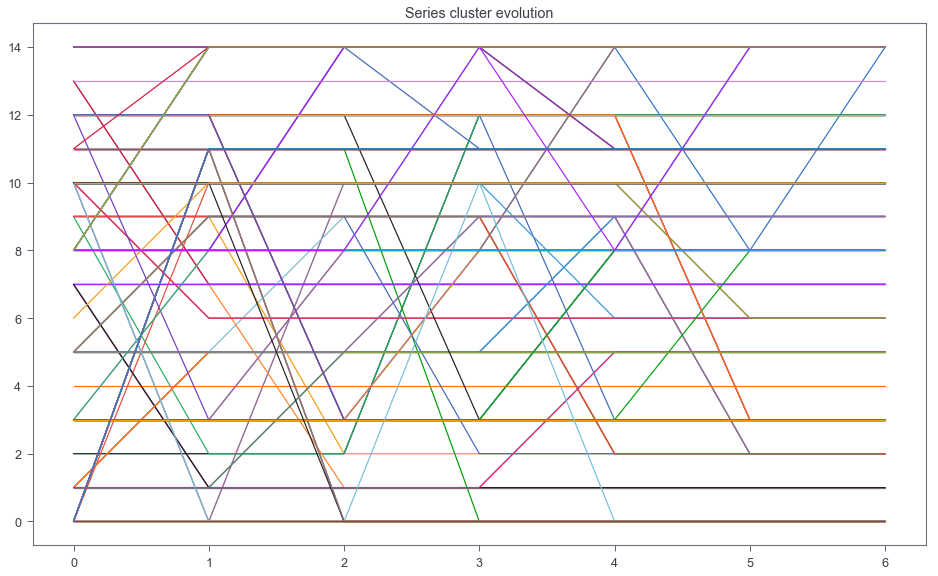

In [57]:
pd.DataFrame(cluster_assignments).plot(legend=False)
plt.title("Series cluster evolution")
plt.show()

In [54]:
changes = pd.DataFrame(cluster_assignments).diff().abs()

In [58]:
print("how many times series change cluster:")
for c in list(changes):
    print(f"{c}  -->  {np.count_nonzero(changes[c].values)}")

how many times series change cluster:
0  -->  2
1  -->  2
2  -->  2
3  -->  3
4  -->  3
5  -->  2
6  -->  1
7  -->  1
8  -->  2
9  -->  2
10  -->  1
11  -->  2
12  -->  2
13  -->  2
14  -->  2
15  -->  2
16  -->  1
17  -->  2
18  -->  1
19  -->  2
20  -->  1
21  -->  2
22  -->  2
23  -->  3
24  -->  2
25  -->  3
26  -->  1
27  -->  2
28  -->  2
29  -->  2
30  -->  1
31  -->  1
32  -->  2
33  -->  2
34  -->  2
35  -->  2
36  -->  2
37  -->  1
38  -->  2
39  -->  3
40  -->  3
41  -->  1
42  -->  1
43  -->  1
44  -->  1
45  -->  1
46  -->  3
47  -->  3
48  -->  3
49  -->  2
50  -->  2
51  -->  2
52  -->  3
53  -->  2
54  -->  1
55  -->  1
56  -->  2
57  -->  1
58  -->  1
59  -->  2
60  -->  2
61  -->  2
62  -->  2
63  -->  1
64  -->  1
65  -->  2
66  -->  4
67  -->  2
68  -->  2
69  -->  2
70  -->  2
71  -->  1
72  -->  2
73  -->  2
74  -->  1
75  -->  3
76  -->  3
77  -->  2
78  -->  2
79  -->  2
80  -->  1
81  -->  2
82  -->  2
83  -->  2
84  -->  1
85  -->  1
86  -->  1
87  -->  1
88  

In [60]:
cluster_assign = pd.DataFrame(cluster_assignments)

In [61]:
cluster_assign.shape

(7, 200)

In [62]:
import ipywidgets as widgets

In [67]:
@widgets.interact(x=range(1, cluster_assign.shape[0]))
def g(x):
    _df = cluster_assign.iloc[x]
    plt.scatter(*list(zip(*pcaed)), c=_df, cmap="rainbow")
    plt.title(f"Cluster at time {x}")
    plt.show()

The graph above shows some slight changes for cluster assignments over time, but clusters appear overall stable.

## Rolling time period

In [72]:
# %%time
cluster_assignments = list()

for chunk in tqdm.tqdm_notebook(tools.chunker(data, 90)):
    clusters = km.predict(chunk.T.values)
    cluster_assignments.append(clusters)

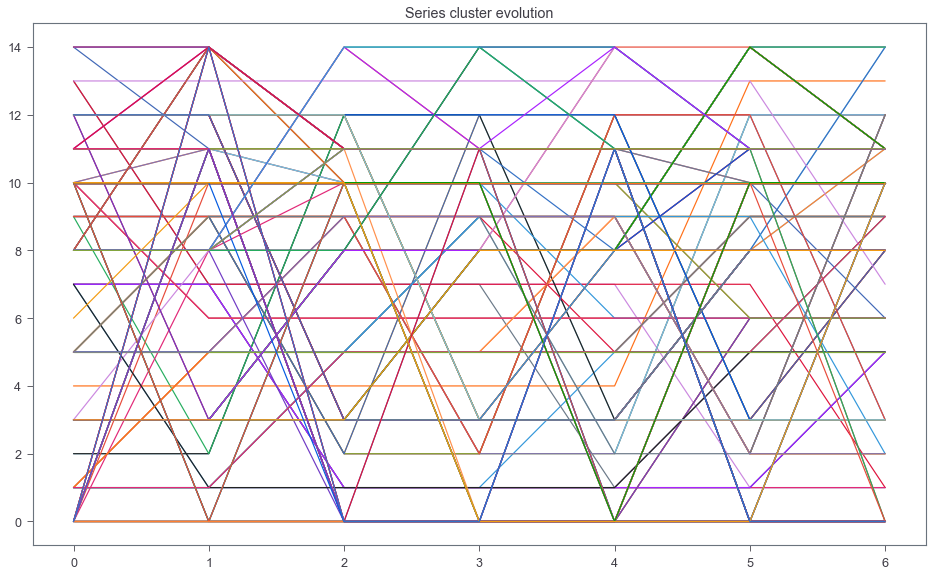

In [73]:
pd.DataFrame(cluster_assignments).plot(legend=False)
plt.title("Series cluster evolution")
plt.show()

In [74]:
changes = pd.DataFrame(cluster_assignments).diff().abs()

In [75]:
print("how many times series change cluster:")
for c in list(changes):
    print(f"{c}  -->  {np.count_nonzero(changes[c].values)}")

how many times series change cluster:
0  -->  3
1  -->  4
2  -->  5
3  -->  3
4  -->  5
5  -->  5
6  -->  1
7  -->  3
8  -->  3
9  -->  3
10  -->  2
11  -->  3
12  -->  3
13  -->  3
14  -->  3
15  -->  2
16  -->  4
17  -->  5
18  -->  2
19  -->  3
20  -->  3
21  -->  5
22  -->  4
23  -->  4
24  -->  3
25  -->  4
26  -->  5
27  -->  3
28  -->  3
29  -->  3
30  -->  3
31  -->  3
32  -->  3
33  -->  4
34  -->  3
35  -->  4
36  -->  3
37  -->  4
38  -->  5
39  -->  3
40  -->  3
41  -->  3
42  -->  4
43  -->  1
44  -->  4
45  -->  2
46  -->  4
47  -->  5
48  -->  5
49  -->  4
50  -->  4
51  -->  4
52  -->  7
53  -->  4
54  -->  2
55  -->  2
56  -->  3
57  -->  2
58  -->  4
59  -->  5
60  -->  3
61  -->  4
62  -->  3
63  -->  3
64  -->  3
65  -->  4
66  -->  4
67  -->  4
68  -->  2
69  -->  2
70  -->  3
71  -->  2
72  -->  5
73  -->  5
74  -->  3
75  -->  3
76  -->  4
77  -->  2
78  -->  2
79  -->  3
80  -->  3
81  -->  2
82  -->  5
83  -->  3
84  -->  1
85  -->  1
86  -->  1
87  -->  1
88  

In [76]:
cluster_assign = pd.DataFrame(cluster_assignments)

In [77]:
cluster_assign.shape

(7, 200)

In [78]:
import ipywidgets as widgets

In [79]:
@widgets.interact(x=range(1, cluster_assign.shape[0]))
def g(x):
    _df = cluster_assign.iloc[x]
    plt.scatter(*list(zip(*pcaed)), c=_df, cmap="rainbow")
    plt.title(f"Cluster at time {x}")
    plt.show()